Jumlah Node: 277
Jumlah Edge: 422


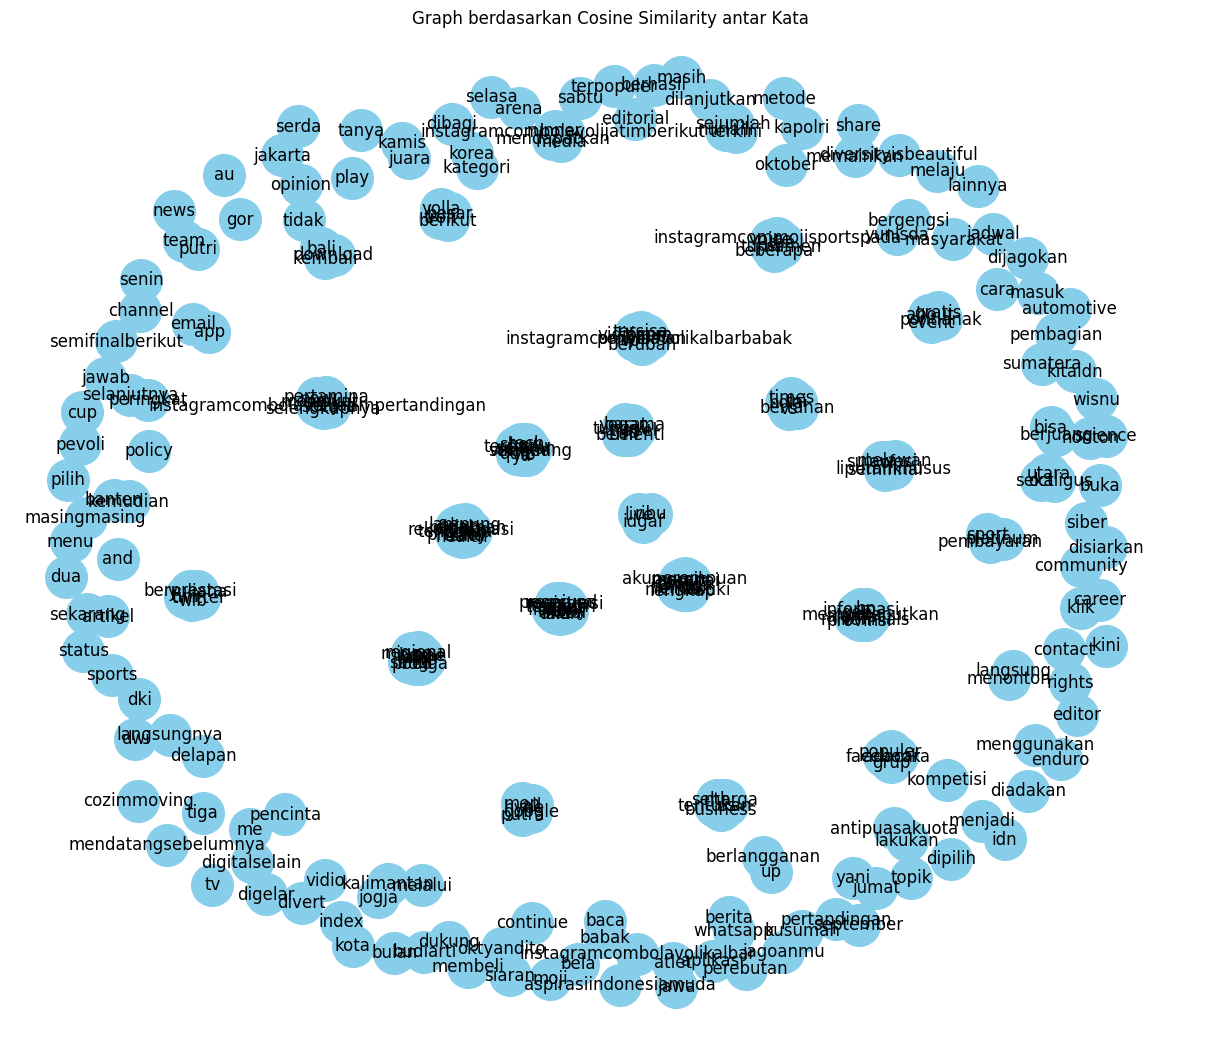

Centrality:
about: 0.010869565217391304
adacara: 0.010869565217391304
akan: 0.036231884057971016
akun: 0.036231884057971016
akuperempuan: 0.028985507246376812
al: 0.028985507246376812
alamat: 0.025362318840579712
all: 0.014492753623188406
and: 0.0
antipuasakuota: 0.0036231884057971015
aplikasi: 0.0
app: 0.0036231884057971015
arena: 0.0
artikel: 0.0
aspirasiindonesiamuda: 0.0
atlet: 0.0
au: 0.0
automotive: 0.0
babak: 0.0036231884057971015
baca: 0.0036231884057971015
bali: 0.007246376811594203
banten: 0.0036231884057971015
barat: 0.018115942028985508
beberapa: 0.018115942028985508
bela: 0.0
beli: 0.018115942028985508
bergengsi: 0.0036231884057971015
berhasil: 0.0
berhenti: 0.018115942028985508
berikut: 0.010869565217391304
berita: 0.0036231884057971015
berjuang: 0.0036231884057971015
berlangganan: 0.0036231884057971015
berprestasi: 0.014492753623188406
bertahan: 0.014492753623188406
berubah: 0.021739130434782608
besar: 0.010869565217391304
bisa: 0.0036231884057971015
bola: 0.014492753623

In [6]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import re

# Step 1: Crawling data
url = "https://www.idntimes.com/sport/arena/yogama-wisnu-oktyandito/jadwal-kapolri-cup-2024-babak-8-besar-hingga-final"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
text = soup.get_text()

# Step 2: Pre-processing
# Lowercase & Case Folding
text = text.lower()

# Cleansing
text = re.sub(r'[^a-zA-Z\s]', '', text)

# Tokenize
tokens = text.split()

# Daftar stopword manual
stop_words = {
    "yang", "dan", "di", "dari", "ke", "adalah", "untuk", "itu", 
    "ini", "pada", "juga", "dengan", "tersebut", "atau", "sebuah",
    "saat", "dalam", "mereka", "lebih", "atas", "setiap", "selain"
}

# Stopword Removal
filtered_tokens = [word for word in tokens if word not in stop_words]

# Step 3: Matriks Frekuensi
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(filtered_tokens)

# Step 4: Cosinus
cosine_matrix = cosine_similarity(X)  # menggunakan X, bukan frequency_matrix

# Step 5: Buat graf berdasarkan cosine similarity
G = nx.Graph()

# Tambahkan node berdasarkan kata
words = vectorizer.get_feature_names_out()
for word in words:
    G.add_node(word)

# Tambahkan edge berdasarkan cosine similarity
for i in range(len(words)):
    for j in range(len(words)):
        similarity = cosine_matrix[i][j]
        if similarity >= 0.05 and i != j:  # Menggunakan threshold 0.05
            G.add_edge(words[i], words[j], weight=similarity)

# Menggambar graf
plt.figure(figsize=(12, 10))

# Layout untuk penempatan node
pos = nx.spring_layout(G, seed=42)

# Menggambar node dan edge
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=900, edge_color='gray', width=2)

# Menampilkan jumlah node dan edge
print("Jumlah Node:", nx.number_of_nodes(G))
print("Jumlah Edge:", nx.number_of_edges(G))

# Menampilkan plot
plt.title("Graph berdasarkan Cosine Similarity antar Kata")
plt.show()

# Step 6: Centrality
# Hitung centrality
centrality = nx.degree_centrality(G)

# Tampilkan hasil centrality
print("Centrality:")
for word, cent in centrality.items():
    print(f"{word}: {cent}")
